## [HomeWork]  랜덤포레스트 결과를 xgboost로 재현합니다.

## 1. xgboost 모델 만들기

In [ ]:
#아나콘다 프롬프트 pip install xgboost

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
!pip3 install xgboost
import xgboost 
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [84]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
x=iris.data
y=iris.target

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.25, stratify=iris.target, random_state=4)


In [87]:
mdl=xgboost.XGBClassifier(n_estimatios=100,objective='multi:softmax',random_state=123456)

In [88]:
mdl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimatios=100,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=123456, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

# 2. test set에 적합하기

In [89]:
from sklearn.metrics import accuracy_score

predicted = mdl.predict(X_test) # mdl모델에 X_test를 넣고 그 예측값을 predicted에 저장
accuracy = accuracy_score(y_test, predicted) # 실제 데이터와 예측값이 일치하는 비율

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.947


## 3. confusion matrix로 분류 결과 시각화

In [90]:
from sklearn.metrics import confusion_matrix
cm_xgb = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)

cm_xgb

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,11,1
virginica,0,1,12


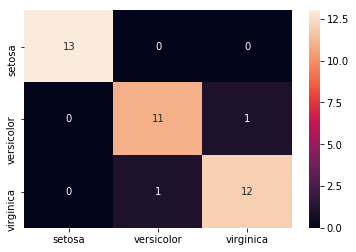

In [91]:
sns.heatmap(cm_xgb, annot=True)

## 4. 랜덤포레스트와 xgboost의 결과를 비교해주세요.

rf 결과 다시 불러옴

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.25, stratify=iris.target, random_state=4)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [93]:
predicted = rf.predict(X_test) # rf 모델에 X_test를 넣고 그 예측값을 predicted에 저장
accuracy = accuracy_score(y_test, predicted) # 실제 데이터와 예측값이 일치하는 비율

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.921


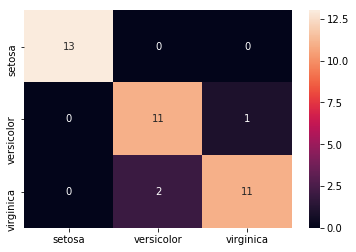

In [94]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

<결과 비교>(편의를 위해 train, test set 분할의 seed(random_state)는 4, xgb와 rf classifier로 분할 시 seed(random_state)는 123456으로 통일하였다.)

먼저 mean accuracy score를 보면 xgb로 했을 때 0.947, rf로 했을 때 0.921였다. xgb의 accuracy가 더 높음을 알 수 있다.
시각적으로도 알아볼 수 있는데, sns.heatmap의 결과를 참조하면 된다.